In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
Input_data = pd.read_csv('/content/drive/MyDrive/CW Data - Machine Learning/Inputs data.csv')
X = np.array(Input_data)

In [ ]:
Output_data= pd.read_csv('/content/drive/MyDrive/CW Data - Machine Learning/Output data.csv')
Y= np.array(Output_data)

In [ ]:
stdsc = StandardScaler()
scaler = MinMaxScaler()

In [ ]:
xtoy = stdsc.fit_transform(X)
scaler.fit(X)
xtoy= scaler.transform(X)

In [ ]:
ytoy = stdsc.fit_transform(Y)
scaler.fit(Y)
ytoy= scaler.transform(Y)

In [ ]:
T = ytoy[:,0]
T.shape

(1029,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xtoy, T, test_size=0.4)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(617, 8) (617,) (412, 8) (412,)


In [ ]:
Concrete_Data = pd.DataFrame(data=x_train, columns = {"Cement","Blast Furnace Slag","Fly Ash","Water","Superplasticizer","Coarse Aggregate","Fine Aggregate","Age"}) 

Concrete_Data['Target -- Compressive Strength'] = y_train

Concrete_Data

,Age,Superplasticizer,Coarse Aggregate,Fine Aggregate,Cement,Blast Furnace Slag,Water,Fly Ash,Target -- Compressive Strength
0,0.447032,0.381747,0.534233,0.634984,0.186335,0.225000,0.153788,0.074176,0.637723
1,0.430137,0.000000,0.480760,0.369808,0.291925,0.465698,0.679880,0.271978,0.581039
2,0.146347,0.000000,0.816092,0.436901,0.139752,0.748837,0.466884,0.074176,0.239317
3,0.737443,0.295771,0.000000,0.236422,0.577640,0.392442,0.526091,0.005495,0.423197
4,0.563927,0.000000,0.000000,0.560703,0.000000,0.715116,0.531862,0.074176,0.378597
...,...,...,...,...,...,...,...,...,...
612,0.511416,0.000000,0.689655,0.616613,0.341615,0.000000,0.496739,0.074176,0.477763
613,0.980137,0.000000,0.000000,0.159744,0.875776,0.148547,0.751882,0.247253,0.708484
614,0.586758,0.052866,0.704648,0.257188,0.338509,0.409884,0.519318,0.016484,0.451975
615,0.547945,0.105732,0.000000,0.848243,0.000000,0.380814,0.190667,0.491758,0.620282


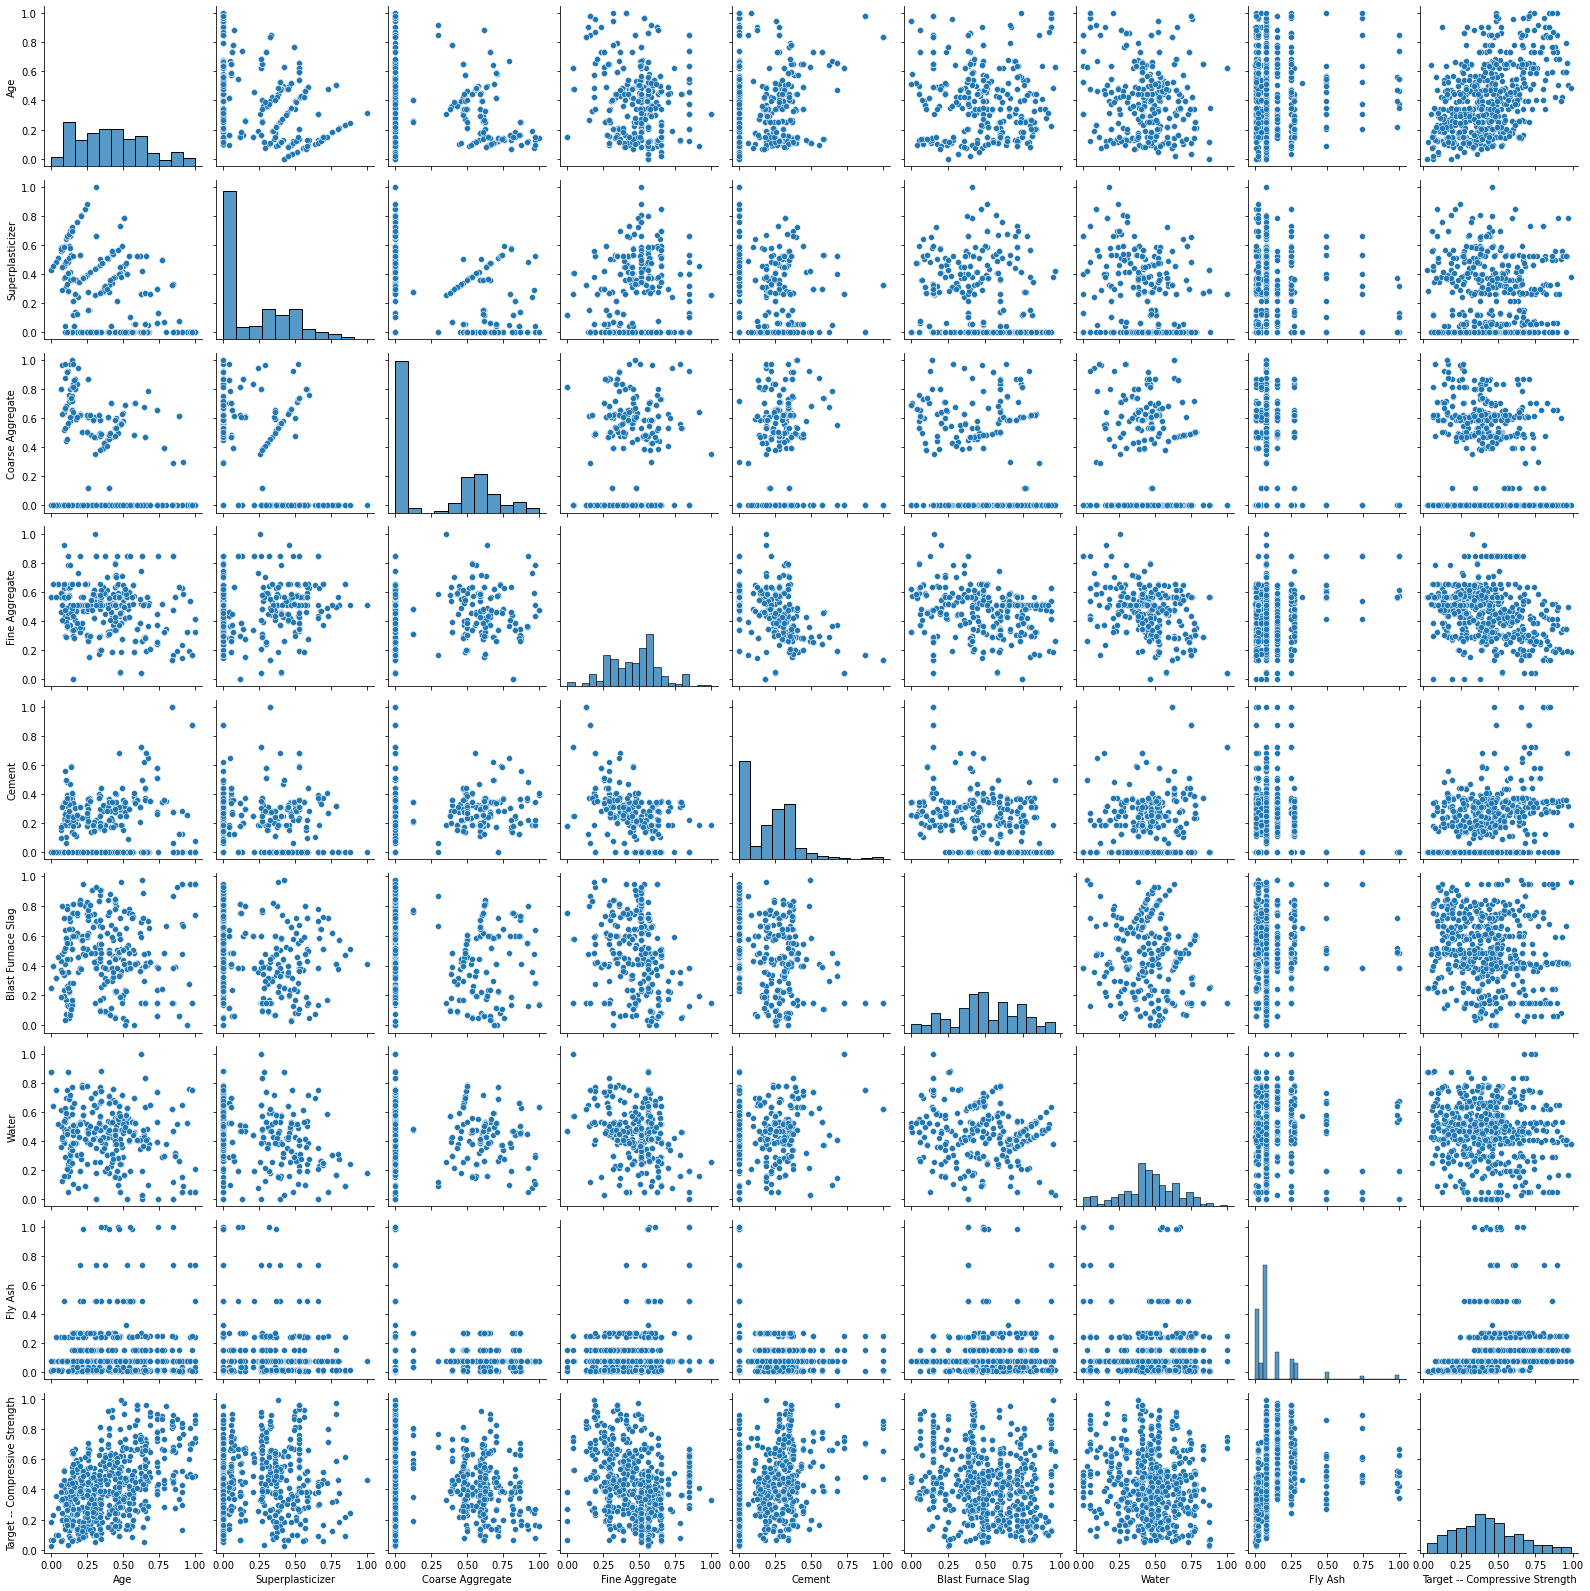

In [ ]:
import seaborn as sns
# 相关系数热力图
sns.pairplot(Concrete_Data)

# Parameters of the Perceptron neural network

In [ ]:
#no_inputs = 1030
#no_hidden_neurons = 4
#no_outputs = 1030
#no_samples = 8

# Weights for layer 1
#V1 = np.random.rand(4,8)

# Weights for layer 2
#W2 = np.random.rand(1,8)


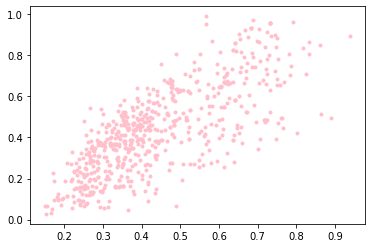

In [ ]:
from sklearn.neural_network import MLPRegressor

ann_model = MLPRegressor(hidden_layer_sizes=(8,24,1),max_iter = 300,activation = 'tanh',solver = 'adam')
ann_model.fit(x_train, y_train)
#print('no of Neurons={}, accuracy:{:.3f}'.format(unit, ann_model.score(x_test, y_test)))

pred1_train = ann_model.predict(x_train)

plt.scatter(pred1_train, y_train, marker='.', color='pink')
    #def train(self, Y):
        #self.mlp.fit(self.X,Y)

    #ef test(self, X_test):
        #return self.mlp.predict(X_test)


#def RMSE(y_gt, y_pred):
    #rmse = sqrt(mean_squared_error(y_gt, y_pred))
    #return rmse
  

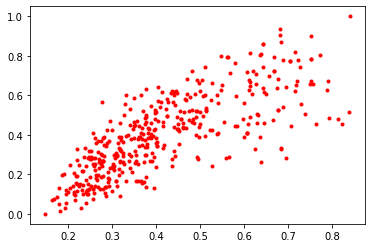

In [ ]:
pred1_test = ann_model.predict(x_test)
#print(pred1_test.shape)
#print(y_test.shape)
plt.scatter(pred1_test, y_test, marker='.', color='red')

# Reverse-Normalisation

In [ ]:
pred2_test = [pred1_test]
Y_test_pred = scaler.inverse_transform(pred2_test)
Y_test_pred = Y_test_pred[0]

In [ ]:
y2_test = [y_test]
Y_test_Final = scaler.inverse_transform(y2_test)
Y_test_Final = Y_test_Final[0]

Text(0, 0.5, 'Prediction Compressive Strength (MPa)')

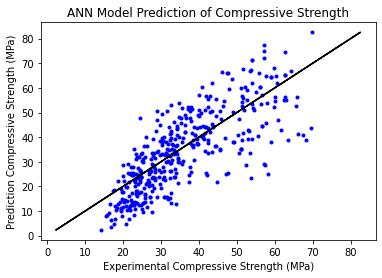

In [ ]:
#prediction = ann_model.predict(x_test)

plt.scatter(Y_test_pred,Y_test_Final, marker='.', color='blue')
plt.plot(Y_test_Final, Y_test_Final, 'black')
plt.title("ANN Model Prediction of Compressive Strength")
plt.xlabel("Experimental Compressive Strength (MPa)")
plt.ylabel("Prediction Compressive Strength (MPa)")

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import sqrt

In [ ]:
mse = mean_squared_error(Y_test_pred, Y_test_Final)
print(f"r2 Score Of Train Set : {r2_score(Y_test_pred, Y_test_Final)}")
print("MSE: %.2f" % mse)
print("RMSE of train: %.2f" % sqrt(mse))

r2 Score Of Train Set : 0.35272593141906605
MSE: 105.51
RMSE of train: 10.27
